### Assessment 1

# GapMinder Democracy Rate and Suicide

After reading the GapMinder code book, i began really interested in democracy rate and its impacts. So, the first question that comes to mind is if the democracy rate is correlated to the suicide rate.

A quick search in the Google Scholar returned [a very brief paper](https://journals.sagepub.com/doi/abs/10.2466/pr0.1999.85.2.518) that aims to answer the question if democracy rate is correlated to the homicide and the suicide rate. The data analysed was separated in two: before and after 1965, where the first seems not to be correlated and the second is. The metric used was Pearson’s correlations. <br>

Another paper found was [“Democracy, Autocracy, and Direction of Lethal Violence: Homicide and Suicide”](https://journals.sagepub.com/doi/abs/10.1177/1088767918775465), which discovered “that people in a democratic nation are likely to direct violence inward rather than outward, blaming themselves for their failures and frustrations. By contrast, those in ideal autocratic nations are likely to use violence toward others, directing blame outwards for personal failures and frustrations.” <br>

So, the second question is if the democracy rate is correlated to gender equality. A quick search returned the paper ["Democracy and Gender Equality"](https://link.springer.com/article/10.1007/s12116-009-9043-2) which found that “countries with greater stocks of democracy and longer experience of women’s suffrage have a higher proportion of the population that is female, a greater ratio of female life expectancy to male life expectancy, lower fertility rates, and higher rates of female labor force participation.” <br>

To answer the questions I will use the GapMinder database and codebook, specifically the variables **“polityscore”**, **“suicideper100TH”** and **“femaleemployrate”**. <br>

**polityscore:** <br>

2009 Democracy score (Polity). Overall polity score from the Polity IV dataset, calculated by subtracting an autocracy score from a democracy score. The summary measure of a country's democratic and free nature. -10 is the lowest value, 10 the highest. Source: Polity IV Project.

**suicideper100TH:**<br>
2005 Suicide, age adjusted, per 100 000 Mortality due to self-inflicted injury, per 100 000 standard population, age adjusted. Souce: Combination of time series from WHO Violence and Injury Prevention (VIP) and data from WHO Global Burden of Disease 2002 and 2004.

**femaleemployrate:** <br>
2007 female employees age 15+ (% of population) Percentage of female population, age above 15, that has been employed during the given year. Source: International Labour Organization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Assessment 2

In [2]:
# importing the database
df = pd.read_csv('gapminder.csv')
#parsing the blank spaces to nan values
df = df.replace(r'^\s*$', np.nan, regex=True)
#parsing the number strings to numeric values
df['polityscore'] = pd.to_numeric(df['polityscore'])
df['suicideper100th'] = pd.to_numeric(df['suicideper100th'])
df['femaleemployrate'] = pd.to_numeric(df['femaleemployrate'])
#showing the head of the table
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,NaN,.03,.5696534,26.8,75944000,25.600000,NaN,3.65412162280064,48.673,NaN,0.0,NaN,6.684385,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.099998,NaN,44.9899469578783,76.918,NaN,9.0,636.341383366604,7.699330,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.700001,.1,12.5000733055148,73.131,.42009452521537,2.0,590.509814347428,4.848770,50.5,65.22
3,Andorra,21943.3398976022,10.17,NaN,NaN,NaN,NaN,NaN,81,NaN,NaN,NaN,NaN,5.362179,NaN,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.400002,2,9.99995388324075,51.093,NaN,-2.0,172.999227388199,14.554677,75.6999969482422,56.7


In [3]:
#selecting the interested variables
df1 = df[['country', 'polityscore', 'suicideper100th', 'femaleemployrate']].set_index('country')
df1.head()

,polityscore,suicideper100th,femaleemployrate
country,,,
Afghanistan,0.0,6.684385,25.600000
Albania,9.0,7.699330,42.099998
Algeria,2.0,4.848770,31.700001
Andorra,NaN,5.362179,NaN
Angola,-2.0,14.554677,69.400002


In [4]:
#counting the polity score
polity_count = df1['polityscore'].value_counts(sort = False, dropna = False).sort_index()
#getting its percentage
polity_percentage = df1['polityscore'].value_counts(sort = False, normalize = True, dropna = False).sort_index()
#turning it into a DataFrame
polity = pd.DataFrame(np.array([polity_count, polity_percentage]).T, columns = ['Counts', '%'], index = polity_count.index)
#styling the rows to show int values and % values
polity.style.format({'%':"{:.2%}", 'Counts':"{:.0f}"})\
            .set_caption("Polity Score or Democracy Rate")

,Counts,%
-10.0,2,0.94%
-9.0,4,1.88%
-8.0,2,0.94%
-7.0,12,5.63%
-6.0,3,1.41%
-5.0,2,0.94%
-4.0,6,2.82%
-3.0,6,2.82%
-2.0,5,2.35%
-1.0,4,1.88%


In [5]:
#counting the suicide rate
suicide_count = df1['suicideper100th'].value_counts(sort = False, bins = 10, dropna = False).sort_index()
#getting its percentage
suicide_percentage = df1['suicideper100th'].value_counts(sort = False, normalize = True, bins = 10, dropna = False).sort_index()
#turning it into a DataFrame
suicide = pd.DataFrame(np.array([suicide_count, suicide_percentage]).T, columns = ['Counts', '%'], index = suicide_count.index)
#styling the rows to show int values and % values
suicide.style.format({'%':"{:.2%}", 'Counts':"{:.0f}"})\
            .set_caption("Suicide per 100 people")

,Counts,%
"(0.165, 3.757]",26,12.21%
"(3.757, 7.312]",53,24.88%
"(7.312, 10.867]",48,22.54%
"(10.867, 14.422]",30,14.08%
"(14.422, 17.977]",16,7.51%
"(17.977, 21.532]",8,3.76%
"(21.532, 25.087]",2,0.94%
"(25.087, 28.643]",5,2.35%
"(28.643, 32.198]",1,0.47%
"(32.198, 35.753]",2,0.94%


In [6]:
#counting the female employ rate 
female_count = df1['femaleemployrate'].value_counts(sort = False, bins = 10, dropna = False).sort_index()
#getting its percentage
female_percentage = df1['femaleemployrate'].value_counts(sort = False, normalize = True, bins = 10, dropna = False).sort_index()
#turning it into a DataFrame
female = pd.DataFrame(np.array([female_count, female_percentage]).T, columns = ['Counts', '%'], index = female_count.index)
#styling the rows to show int values and % values
female.style.format({'%':"{:.2%}", 'Counts':"{:.0f}"})\
            .set_caption("Female employ rate")

,Counts,%
"(11.227, 18.5]",6,2.82%
"(18.5, 25.7]",9,4.23%
"(25.7, 32.9]",8,3.76%
"(32.9, 40.1]",30,14.08%
"(40.1, 47.3]",35,16.43%
"(47.3, 54.5]",40,18.78%
"(54.5, 61.7]",24,11.27%
"(61.7, 68.9]",12,5.63%
"(68.9, 76.1]",7,3.29%
"(76.1, 83.3]",7,3.29%


### Assessment 3

In [7]:
#binning the democracy rate values into groups of 5 points
polity_quart = pd.cut(df1.polityscore, [-10.01, -5, 0, 5, 10])
#counting the polity score
polity_count = polity_quart.value_counts(sort = False, dropna = False).sort_index()
#getting its percentage
polity_percentage = polity_quart.value_counts(sort = False, normalize = True, dropna = False).sort_index()
#turning it into a DataFrame
polity = pd.DataFrame(np.array([polity_count, polity_percentage]).T, columns = ['Counts', '%'], index = polity_count.index)
#styling the rows to show int values and % values
polity.style.format({'%':"{:.2%}", 'Counts':"{:.0f}"})\
            .set_caption("Polity Score or Democracy Rate")


,Counts,%
"(-10.01, -5.0]",25,11.74%
"(-5.0, 0.0]",27,12.68%
"(0.0, 5.0]",19,8.92%
"(5.0, 10.0]",90,42.25%
nan,52,24.41%


In [8]:
#binning the suicide rate values into quartiles
suicide_quart = pd.qcut(df1.suicideper100th, 4)
#counting the suicide rate
suicide_count = suicide_quart.value_counts(sort = False, dropna = False).sort_index()
#getting its percentage
suicide_percentage = suicide_quart.value_counts(sort = False, normalize = True, dropna = False).sort_index()
#turning it into a DataFrame
suicide = pd.DataFrame(np.array([suicide_count, suicide_percentage]).T, columns = ['Counts', '%'], index = suicide_count.index)
#styling the rows to show int values and % values
suicide.style.format({'%':"{:.2%}", 'Counts':"{:.0f}"})\
            .set_caption("Suicide per 100 people")

,Counts,%
"(0.2, 4.988]",48,22.54%
"(4.988, 8.263]",48,22.54%
"(8.263, 12.329]",47,22.07%
"(12.329, 35.753]",48,22.54%
nan,22,10.33%


In [9]:
#binning the female employ rate values into quartiles
female_quart = pd.qcut(df1.femaleemployrate, 4)
#counting the female employ rate 
female_count = female_quart.value_counts(sort = False, dropna = False).sort_index()
#getting its percentage
female_percentage = female_quart.value_counts(sort = False, normalize = True, dropna = False).sort_index()
#turning it into a DataFrame
female = pd.DataFrame(np.array([female_count, female_percentage]).T, columns = ['Counts', '%'], index = female_count.index)
#styling the rows to show int values and % values
female.style.format({'%':"{:.2%}", 'Counts':"{:.0f}"})\
            .set_caption("Female employ rate")

,Counts,%
"(11.299000000000001, 38.725]",45,21.13%
"(38.725, 47.55]",44,20.66%
"(47.55, 55.875]",44,20.66%
"(55.875, 83.3]",45,21.13%
nan,35,16.43%


### Assessment 4


In [10]:
import seaborn as sbn
import matplotlib.pyplot as plt


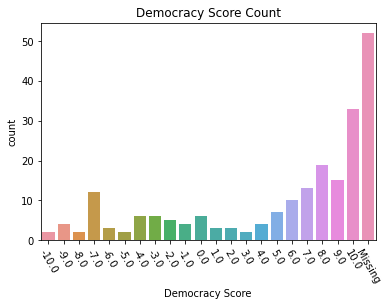

In [11]:
polityscore_cat = df1['polityscore'].sort_values().fillna('Missing')
polityscore_cat = polityscore_cat.astype('category');
g = sbn.countplot(polityscore_cat);
g.set_xticklabels(g.get_xticklabels(), rotation=-60);
plt.title("Democracy Score Count");
plt.xlabel("Democracy Score");

Text(0, 0.5, 'Count')

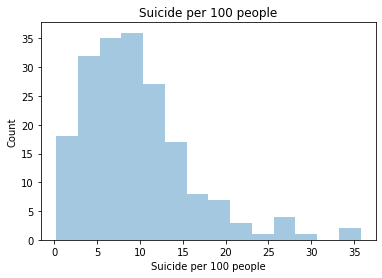

In [12]:
sbn.distplot(df1['suicideper100th'].dropna(), kde = False);
plt.title("Suicide per 100 people");
plt.xlabel("Suicide per 100 people");
plt.ylabel("Count")

Text(0, 0.5, 'Count')

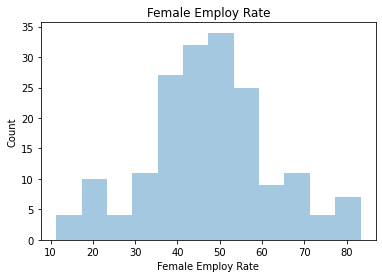

In [13]:
sbn.distplot(df1['femaleemployrate'].dropna(), kde = False);
plt.title("Female Employ Rate");
plt.xlabel("Female Employ Rate");
plt.ylabel("Count")

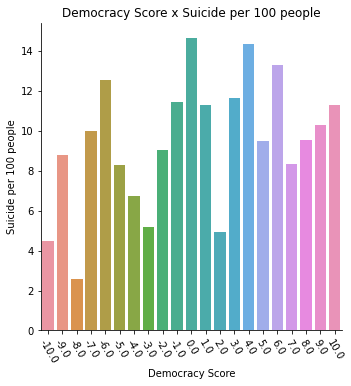

In [26]:
g = sbn.catplot(x = 'polityscore', y = 'suicideper100th', data = df1, kind = 'bar', ci = None);
g.set_xticklabels(rotation=-60);
plt.title("Democracy Score x Suicide per 100 people");
plt.xlabel("Democracy Score");
plt.ylabel("Suicide per 100 people");

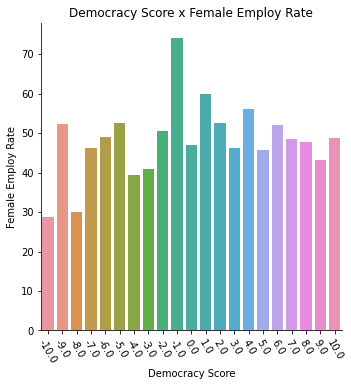

In [27]:
g = sbn.catplot(x = 'polityscore', y = 'femaleemployrate', data = df1, kind = 'bar', ci = None);
g.set_xticklabels(rotation=-60);
plt.title("Democracy Score x Female Employ Rate");
plt.xlabel("Democracy Score");
plt.ylabel("Female Employ Rate");

In [23]:
polityscore_cat.describe()

count         213
unique         22
top       Missing
freq           52
Name: polityscore, dtype: object

In [24]:
df1['polityscore'].astype('category').describe()

count     161.0
unique     21.0
top        10.0
freq       33.0
Name: polityscore, dtype: float64

In [25]:
df1['suicideper100th'].describe()

count    191.000000
mean       9.640839
std        6.300178
min        0.201449
25%        4.988449
50%        8.262893
75%       12.328551
max       35.752872
Name: suicideper100th, dtype: float64

In [28]:
df1['femaleemployrate'].describe()

count    178.000000
mean      47.549438
std       14.625743
min       11.300000
25%       38.725000
50%       47.549999
75%       55.875000
max       83.300003
Name: femaleemployrate, dtype: float64